In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 学習用データの読み込み
df = np.loadtxt('../files/click.csv', delimiter=',', skiprows=1)

In [3]:
train_x = df[:, 0]
train_y = df[:, 1]

# 確率的勾配降下法

### パラメタ更新式
$\displaystyle \theta_j := \theta_j - \eta (f_\theta(x^{(k)}) - y^{(k)})x_j^{(k)}$

- kをランダムに選択してパラメタを更新する

In [4]:
# パラメタの初期化
theta = np.random.rand(3)

In [5]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

In [6]:
# 学習データの行列を作る
def to_matrix(x):
    # np.onesは、値１の配列を作る(=特徴量0をつくっている)
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

In [7]:
# 訓練データの標準化
train_z = standardize(train_x) 

In [8]:
X = to_matrix(train_z)

In [9]:
# 予測関数
def f(x):
    return np.dot(x, theta)

In [10]:
# 平均誤二乗差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [11]:
# 学習率
ETA = 1e-3

In [12]:
# 誤差の差分
diff = 1

In [13]:
# 更新回数
count = 0

In [14]:
# 平均二乗誤差の履歴
errors = []

In [15]:
# 学習
errors.append(MSE(X, train_y))
while diff > 1e-2:
    # 学習データを並べ替えるためにランダムな順列を用意する
    p = np.random.permutation(X.shape[0])
    # 学習データをランダムに取り出して確率的勾配降下法でパラメタを更新する
    for x, y in zip(X[p, :], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

In [16]:
# 誤差をプロット
x = np.arange(len(errors))

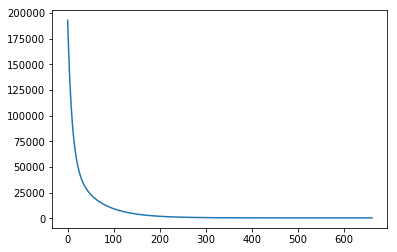

In [17]:
plt.plot(x, errors)
plt.show()

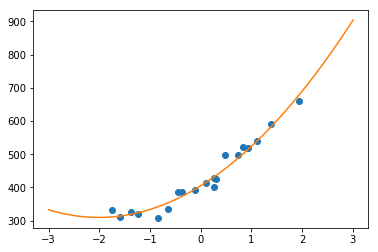

In [19]:
# 学習結果をプロット
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))